# Example of shear-wave splitting measurement for an icequake at Rutford Ice Stream, Antarctica

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

## 1. Calculate splitting:

In [3]:
# Load data:
mseed_file_path = "data/20090121042009180_ice_flow_dir_corrected.m"
archive_vs_file = "file"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"
station_to_analyse = "ST04"
starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(mseed_file_path, starttime=starttime, endtime=endtime, archive_vs_file=archive_vs_file)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()

# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st.select(station=station_to_analyse), nonlinloc_event_path=nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2 
splitting_event.rotate_step_deg = 1.0 
splitting_event.max_t_shift_s = 0.1 
splitting_event.n_win = 10 
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV_and_XC") #(coord_system="LQT") #(coord_system="ZNE")



/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:820: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC


,station,phi_from_Q,phi_from_N,phi_from_U,phi_err,dt,dt_err,src_pol_from_N,src_pol_from_U,src_pol_from_N_err,src_pol_from_U_err,Q_w,lambda2/lambda1 ratio,ray_back_azi,ray_inc
0,ST04,-48.0,54.07,90.0,2.0,0.044,0.001,165.368197,90.444536,6.430684,3.923207,0.0,0.03315,282.07,163.9


## 2. Plot result:

<IPython.core.display.Javascript object>


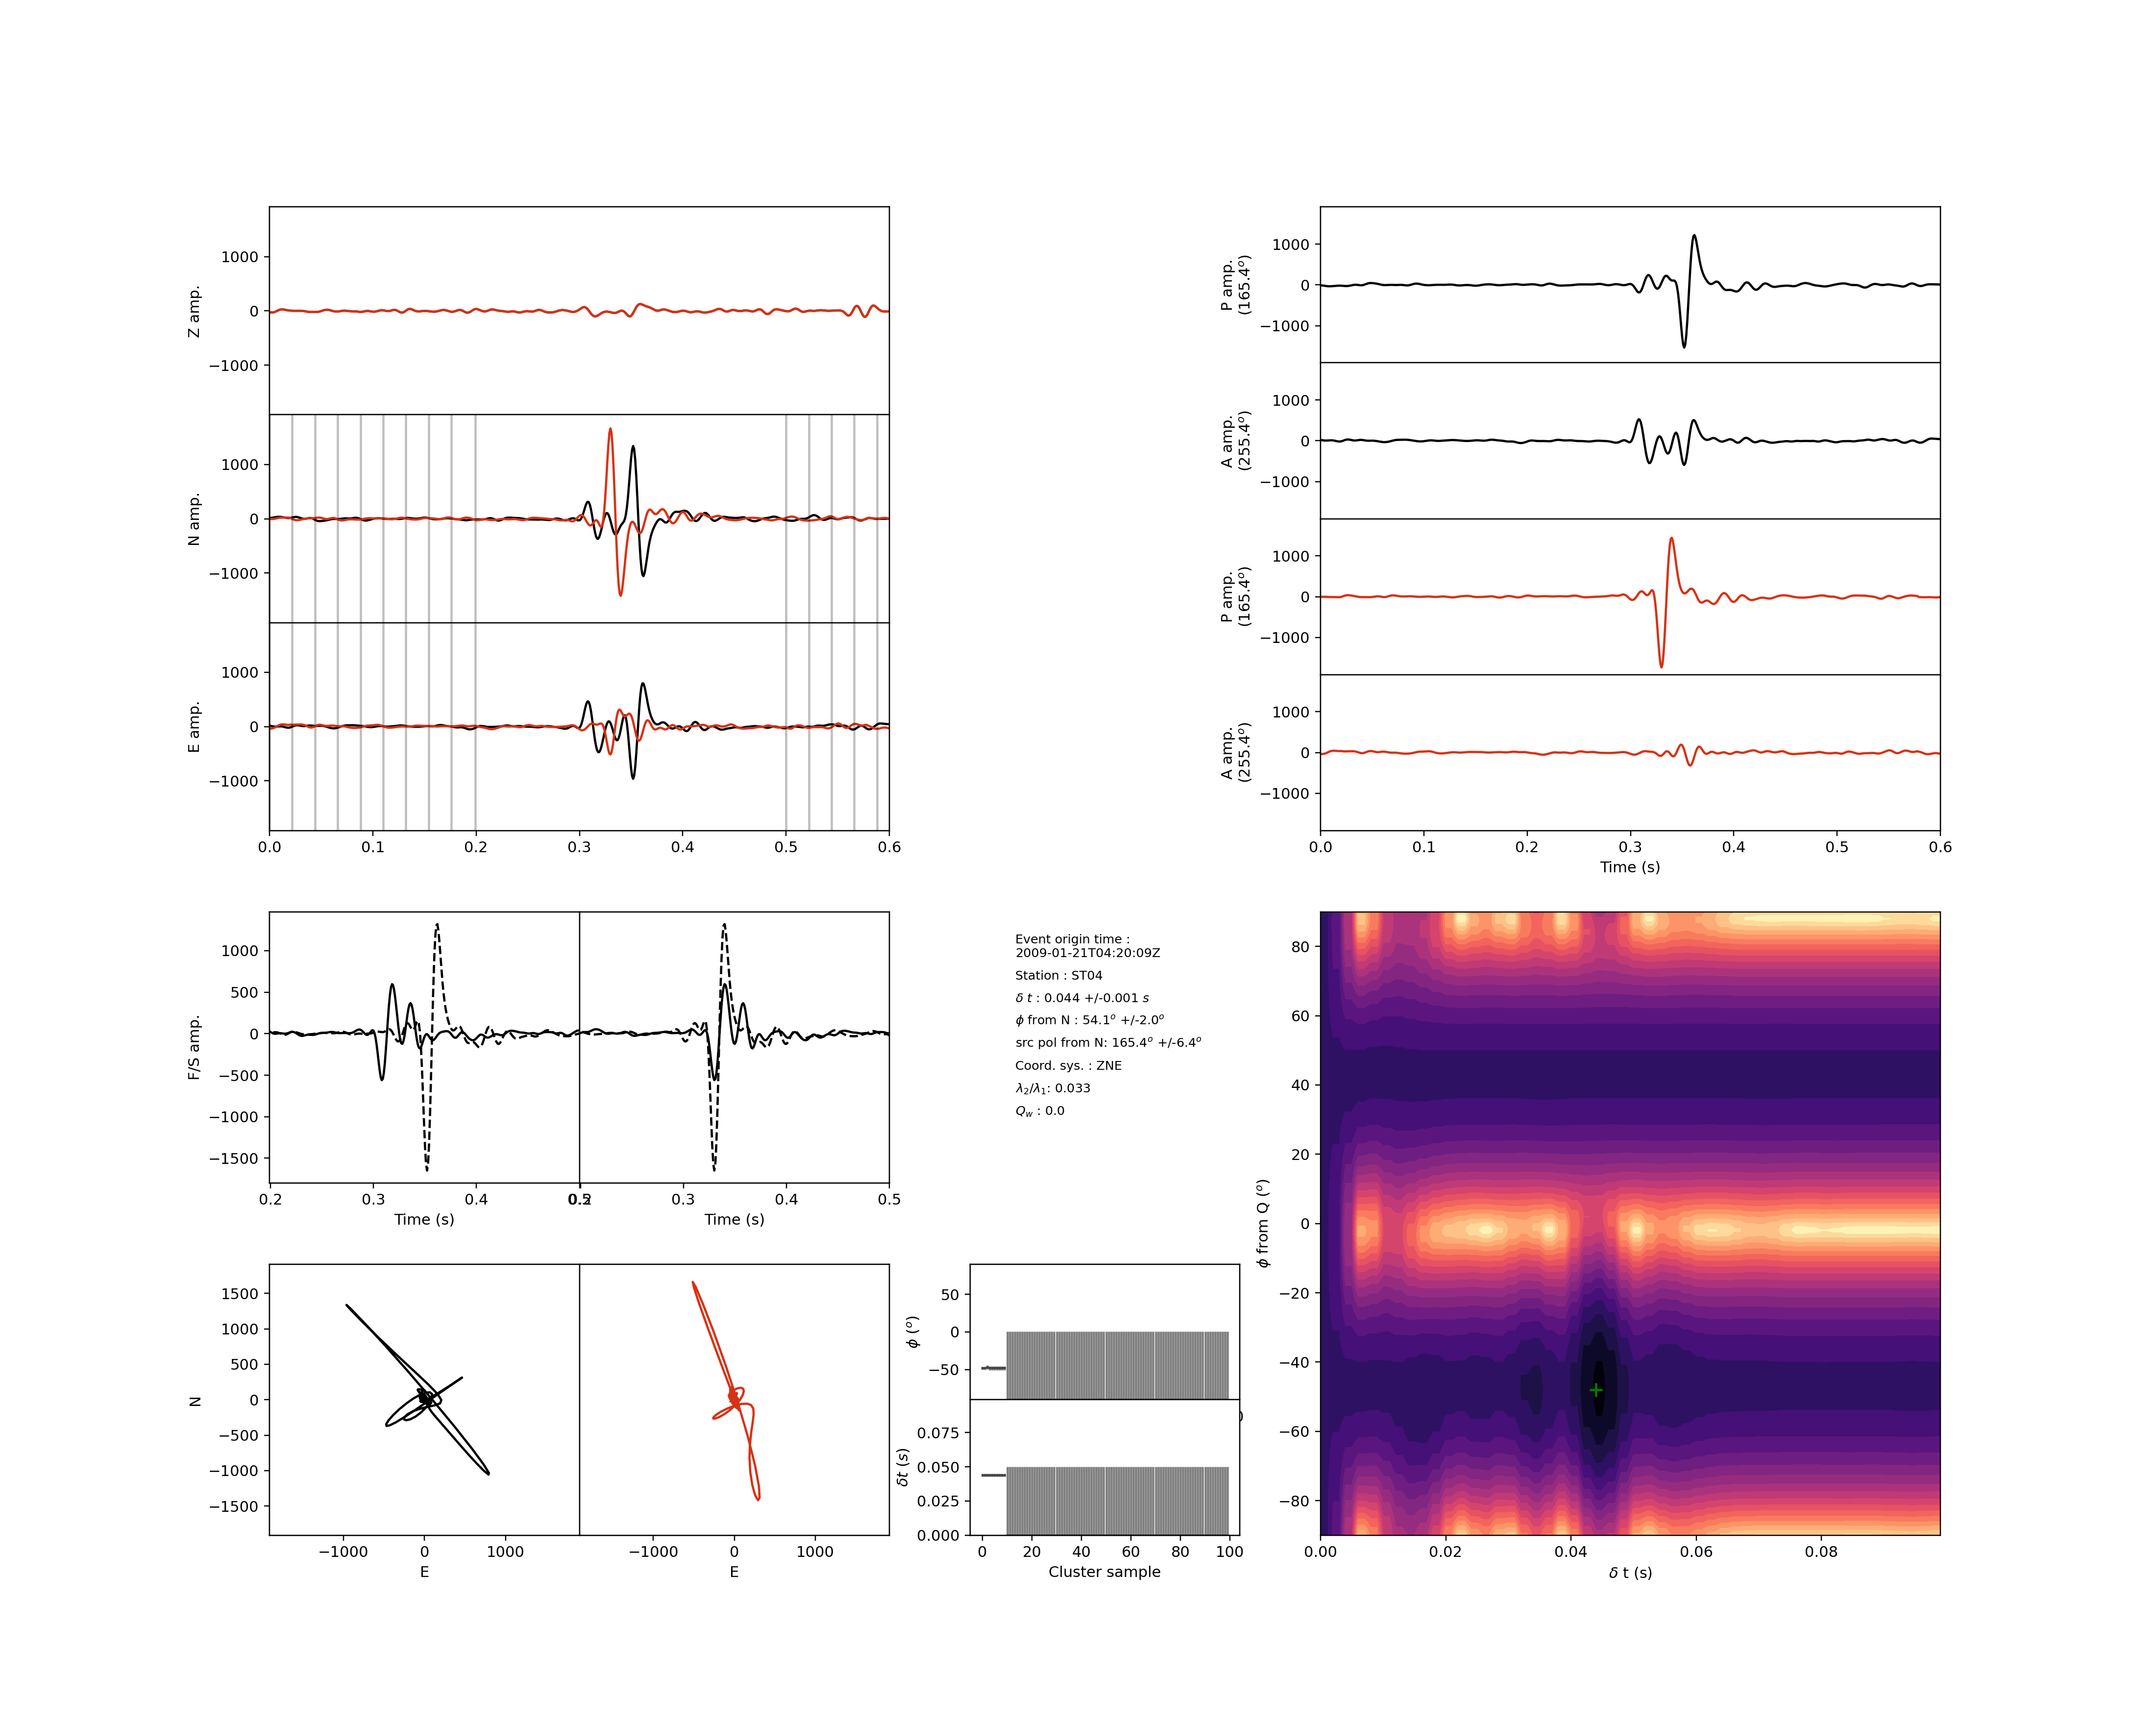

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1653: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


In [4]:
splitting_event.plot(outdir='plots')

## 4. Save result:

In [5]:
# And save result to file:
splitting_event.save_result()


Saved sws result to: /Users/eart0504/Documents/python/github_repositories/swspy/examples/paper_examples/icequake_figure/20090121042009_sws_result.csv
